In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch


In [8]:
def quaternion_to_direction(quat):
    q = quat / torch.norm(quat)
    direction = torch.tensor([
        2 * (q[0] * q[2] + q[1] * q[3]), 
        2 * (q[1] * q[2] - q[0] * q[3]), 
        1 - 2 * (q[0]**2 + q[1]**2)
    ])
    return direction

In [5]:
import omni.isaac.lab.utils.math as math
def m2t2_grasp_to_pos_and_quat(transform_mat):
    pos = transform_mat[..., :3, -1].clone()

    rotation_matrix = transform_mat[..., :3, :3]
    quat = math.quat_from_matrix(rotation_matrix).unsqueeze(0)
    euler_angles = math.euler_xyz_from_quat(quat) 

    roll, pitch, yaw = euler_angles

    yaw -= np.pi/2 # rotate to account for rotated frame between m2t2 and isaac

    yaw = torch.where(yaw > np.pi/2, yaw - np.pi, yaw)
    yaw = torch.where(yaw > np.pi/2, yaw + np.pi, yaw)

    adjusted_quat = math.quat_from_euler_xyz(roll, pitch, yaw).squeeze()

    return pos, adjusted_quat

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_gripper_pose(rotation_matrix):
    pos, quat = m2t2_grasp_to_pos_and_quat(rotation_matrix)

    # Compute the direction vectors for the x, y, and z axes
    R = rotation_matrix[:3, :3]
    x_axis = R[:, 0]
    y_axis = R[:, 1]
    z_axis = R[:, 2]

    # Adjust the position slightly backwards
    direction = quaternion_to_direction(quat)
    print(direction)
    adjusted_pos = pos - 0.05 * direction

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Original position and orientation
    ax.quiver(pos[0], pos[1], pos[2], x_axis[0], x_axis[1], x_axis[2], color='r', length=0.1, label='X-axis')
    ax.quiver(pos[0], pos[1], pos[2], y_axis[0], y_axis[1], y_axis[2], color='g', length=0.1, label='Y-axis')
    ax.quiver(pos[0], pos[1], pos[2], z_axis[0], z_axis[1], z_axis[2], color='b', length=0.1, label='Z-axis')
    ax.scatter(pos[0], pos[1], pos[2], color='r', label='Original Position')

    # Adjusted position
    ax.quiver(adjusted_pos[0], adjusted_pos[1], adjusted_pos[2], x_axis[0], x_axis[1], x_axis[2], color='r', length=0.1, label='Adjusted X-axis')
    ax.quiver(adjusted_pos[0], adjusted_pos[1], adjusted_pos[2], y_axis[0], y_axis[1], y_axis[2], color='g', length=0.1, label='Adjusted Y-axis')
    ax.quiver(adjusted_pos[0], adjusted_pos[1], adjusted_pos[2], z_axis[0], z_axis[1], z_axis[2], color='b', length=0.1, label='Adjusted Z-axis')
    ax.scatter(adjusted_pos[0], adjusted_pos[1], adjusted_pos[2], color='b', label='Adjusted Position')

    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([-0.1, 0.6])
    ax.set_zlim([-0.1, 0.6])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('Gripper Pose Visualization')

    plt.show()


tensor([ 0.0133,  0.9905, -0.1366])


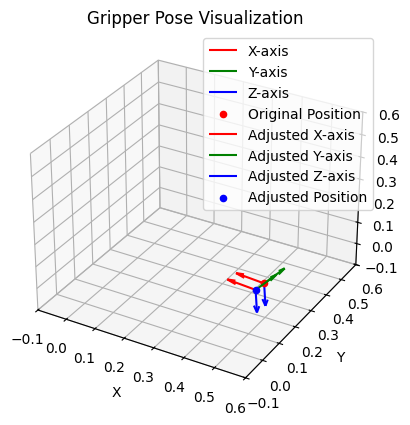

In [9]:
# Sample rotation matrix
# rotation_matrix = torch.tensor([
#     [-0.9951,  0.0809,  0.0561,  0.5311],
#     [ 0.0830,  0.9959,  0.0362,  0.0757],
#     [-0.0530,  0.0407, -0.9978,  0.1347],
#     [ 0.0000,  0.0000,  0.0000,  1.0000]
# ])
rotation_matrix = torch.tensor([[-0.9895,  0.1358,  0.0492,  0.5465],
         [ 0.1366,  0.9905,  0.0133,  0.1022],
         [-0.0469,  0.0199, -0.9987,  0.1473],
         [ 0.0000,  0.0000,  0.0000,  1.0000]])
# rotation_matrix = torch.tensor([[-0.8336,  0.5517,  0.0261,  0.0258],
#          [ 0.2952,  0.4050,  0.8654, -0.1236],
#          [ 0.4668,  0.7291, -0.5005,  0.5963],
#          [ 0.0000,  0.0000,  0.0000,  1.0000]])
visualize_gripper_pose(rotation_matrix)